# Raisin Classification

## 1. Introduction to your dataset and loading:

I am using Raisin dataset available on Kaggle for raisin classification.
The link to the dataset: 
https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset


The discription of the dataset:

The dataset is from the papaer "CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020". 
They developed a machine vision system to distinguish between two different variety of raisins (Kecimen and Besni) grown in Turkey. The images of raisins were subjected to various preprocessing steps and 7 morphological feature extraction operations were performed using image processing techniques. 

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# unzipping the dataset:
! unzip '/content/archive (2).zip'

Archive:  /content/archive (2).zip
  inflating: Raisin_Dataset/Raisin_Dataset.arff  
  inflating: Raisin_Dataset/Raisin_Dataset.xlsx  
  inflating: Raisin_Dataset/Raisin_Dataset_Citation_Request.txt  


In [4]:
df = pd.read_excel("/content/Raisin_Dataset/Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [11]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
# checking for missing values:
df.isnull().sum()     # no missing vlaues

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

## 2. The goal of the analysis:

The goal of the analysis is to reach the highest possible accuracy in raisin classification.

## 3. Perform an exploratory data analysis:

In [ ]:
df.shape  # there are 900 items and 8 columns in the dataset:

(900, 8)

In [ ]:
# Data frame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
# lets see how many classes we have and how many items each class contains:

df['Class'].value_counts()   # we have two classes, each containing 450 items.

Kecimen    450
Besni      450
Name: Class, dtype: int64

### Visualizations:

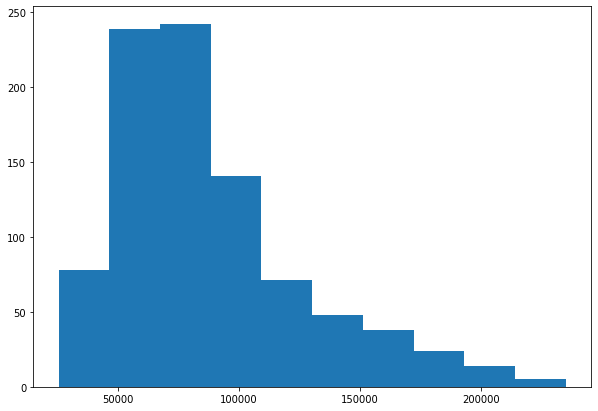

In [ ]:
# histogram of Area:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Area'])
plt.show()

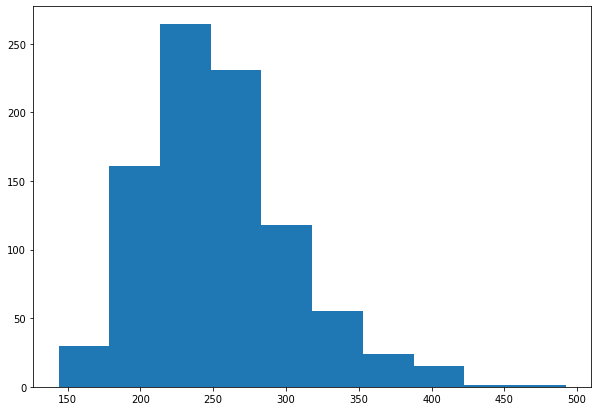

In [ ]:
# histogram of MinorAxisLength:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['MinorAxisLength'])
plt.show()

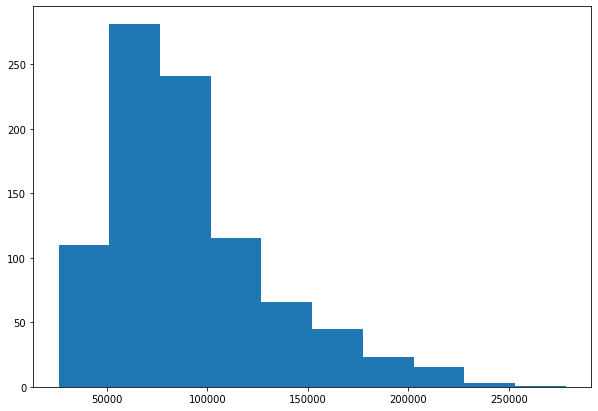

In [ ]:
# histogram of ConvexArea:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['ConvexArea'])
plt.show()


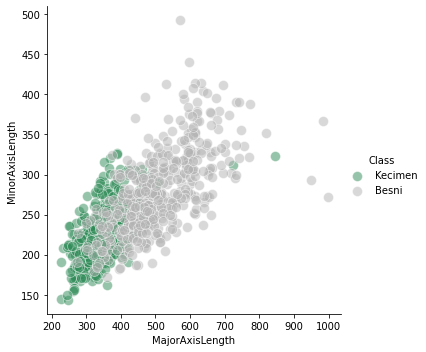

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pal = dict(Kecimen="seagreen", Besni=".7")
g = sns.FacetGrid(df, hue="Class", palette=pal, height=5)
g.map(sns.scatterplot, "MajorAxisLength", "MinorAxisLength", s=100, alpha=.5)
g.add_legend()

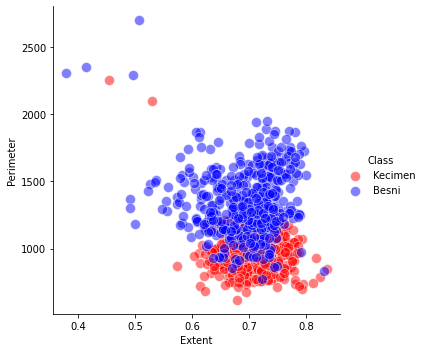

In [ ]:
pal = dict(Kecimen="red", Besni="blue")
g = sns.FacetGrid(df, hue="Class", palette=pal, height=5)
g.map(sns.scatterplot, "Extent", "Perimeter", s=100, alpha=.5)
g.add_legend()

In [ ]:
# correlation analysisL
correlation_matrix = df.corr().round(2)
correlation_matrix

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.00,0.93,0.91,0.34,1.00,-0.01,0.96
MajorAxisLength,0.93,1.00,0.73,0.58,0.95,-0.20,0.98
MinorAxisLength,0.91,0.73,1.00,-0.03,0.90,0.15,0.83
Eccentricity,0.34,0.58,-0.03,1.00,0.35,-0.36,0.45
ConvexArea,1.00,0.95,0.90,0.35,1.00,-0.05,0.98
Extent,-0.01,-0.20,0.15,-0.36,-0.05,1.00,-0.17
Perimeter,0.96,0.98,0.83,0.45,0.98,-0.17,1.00


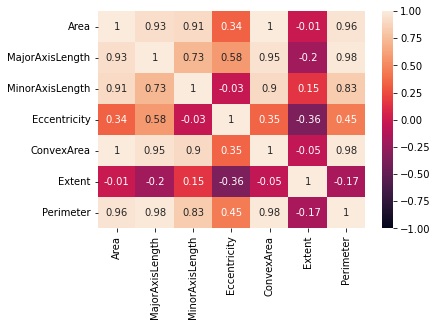

In [ ]:
# visualizing correlation matrix:
sns.heatmap(correlation_matrix, annot=True, vmin = -1, vmax = 1)
plt.show()

There are several highly correlated variables in the dataset. This shows that PCA might be useful to reduce the dimension. However, because the dataset is not that large, I decided not to do PCA.

## 4. Final analysis/Model building
and 
## 5. Evaluating the results

In [ ]:
# dividing dependent and independent variables:
x = df.iloc[:, :-1].values
y = df.iloc[ : , -1].values

In [ ]:
# encoding categorical data:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                               # search the difference between LabelEncoder() and OneHotEncoder()
y = le.fit_transform(y)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Fitting Different Classification Models: 

**1. Logistic Regression:**

In [ ]:
# feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_logistic = sc.fit_transform(x_train)
x_test_logistic = sc.transform(x_test)

In [ ]:
print(x_test_logistic)

[[ 2.07020407  1.56109109  1.9543304  ...  1.95262605  1.00859128
   1.5292635 ]
 [ 3.41706479  1.24138747  4.85856685 ...  3.42178518  0.60586546
   2.90823276]
 [ 0.38330684  0.34760242  0.53198567 ...  0.32498367  1.60041326
   0.27203492]
 ...
 [-0.99007252 -1.38818841 -0.29582561 ... -0.96598727  0.21837201
  -1.06348877]
 [-0.67013297 -1.10828641  0.40668669 ... -0.63651285 -1.04619699
  -0.69600596]
 [-0.4012028  -0.36099069 -0.3449228  ... -0.40538936  0.35468717
  -0.33398663]]


In [ ]:
# Training Logistic Regression on the training set:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_logistic, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results:
y_pred_logistic = classifier.predict(x_test_logistic)
print(np.concatenate((y_pred_logistic.reshape(len(y_pred_logistic),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)
accuracy_score(y_test, y_pred_logistic)

[[83 12]
 [10 75]]


0.8777777777777778

In [ ]:
# accuracy on the training set:

y_pred_train_logistic = classifier.predict(x_train_logistic)
accuracy_score(y_train, y_pred_train_logistic)

0.8625

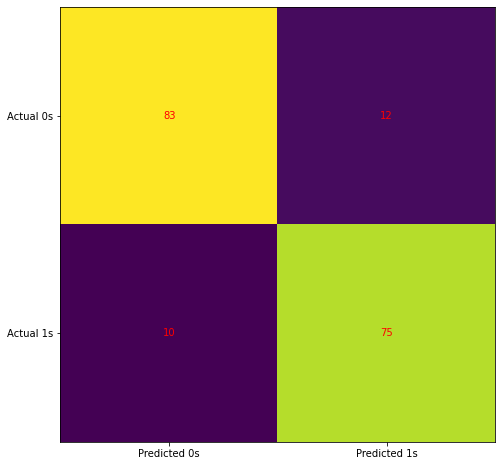

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#grid search for hyperparameter optimization

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train_logistic, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.865278 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.856019 (0.046132) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.856019 (0.046132) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.856019 (0.046132) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.861574 (0.041432) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.862037 (0.041656) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862037 (0.040403) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.862500 (0.039177) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.862500 (0.039177) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.862500 (0.039177) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.863426 (0.037282) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863426 (0.037282) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.865278 (0.038146) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.862963 (0.044464) wit

In [ ]:
# Training the new Logistic Regression on the training set:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear', random_state = 0)
classifier.fit(x_train_logistic, y_train)

LogisticRegression(C=0.1, random_state=0, solver='liblinear')

In [ ]:
# Predicting the Test set results:
y_pred_logistic = classifier.predict(x_test_logistic)

# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)
accuracy_score(y_test, y_pred_logistic)

[[82 13]
 [10 75]]


0.8722222222222222

doing the grid search and hyperparameter optimization improved the accuracy on training set but decreased the accuracy on the test set.



**2. KNN**

In [ ]:
# Feature scaling:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_KNN = sc.fit_transform(x_train)
x_test_KNN = sc.transform(x_test)

In [ ]:
# Training the K-NN model on the Training set:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_KNN, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results:
y_pred_KNN = classifier.predict(x_test_KNN)
print(np.concatenate((y_pred_KNN.reshape(len(y_pred_KNN),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
accuracy_score(y_test, y_pred_KNN)

[[82 13]
 [ 9 76]]


0.8777777777777778

In [ ]:
# accuracy on the training set:

y_pred_train_KNN = classifier.predict(x_train_KNN)
accuracy_score(y_train, y_pred_train_KNN)

0.8805555555555555

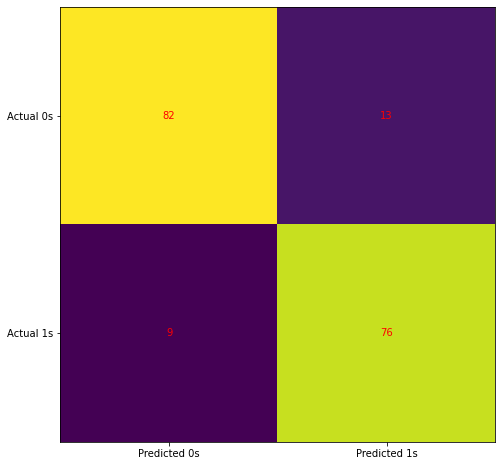

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# grid search for hyperparameter optimization:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [ ]:
# Training the new K-NN model on the Training set:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 1, leaf_size= 1)
classifier.fit(x_train_KNN, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)

In [ ]:
# Predicting the Test set results:
y_pred_KNN = classifier.predict(x_test_KNN)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
accuracy_score(y_test, y_pred_KNN)

[[84 11]
 [11 74]]


0.8777777777777778

**3. SVM**

In [ ]:
# feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_SVM = sc.fit_transform(x_train)
X_test_SVM = sc.transform(x_test)

In [ ]:
# Training the SVM model on the Training set:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_SVM, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results:
y_pred_SVM = classifier.predict(X_test_SVM)
print(np.concatenate((y_pred_SVM.reshape(len(y_pred_SVM),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
accuracy_score(y_test, y_pred_SVM)

[[83 12]
 [ 8 77]]


0.8888888888888888

In [ ]:
# accuracy on the training set:

y_pred_train_SVM = classifier.predict(X_train_SVM)

accuracy_score(y_train, y_pred_train_SVM)

0.8652777777777778

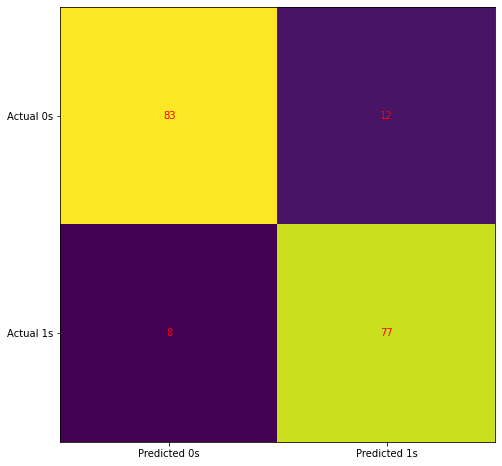

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
#grid search for hyperparameter optimization

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train_SVM, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 86.94 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Training the new SVM model on the Training set:
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'rbf', gamma = 0.1, random_state = 0)
classifier.fit(X_train_SVM, y_train)

SVC(C=1, gamma=0.1, random_state=0)

In [ ]:
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_SVM = classifier.predict(X_test_SVM)
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
accuracy_score(y_test, y_pred_SVM)

[[82 13]
 [ 6 79]]


0.8944444444444445

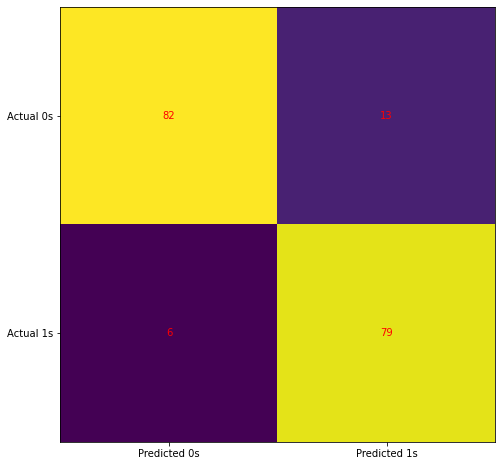

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

**4. Naive Bayes**

In [ ]:
# feature scaling:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_Naive = sc.fit_transform(x_train)
X_test_Naive = sc.transform(x_test)

In [ ]:
# Training the Naive Bayes model on the Training set:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_Naive, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results:
y_pred_Naive = classifier.predict(X_test_Naive)
print(np.concatenate((y_pred_Naive.reshape(len(y_pred_Naive),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making confusion matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_Naive)
print(cm)
accuracy_score(y_test, y_pred_Naive)

[[75 20]
 [ 7 78]]


0.85

In [ ]:
# accuracy on training set:

y_pred_train_Naive = classifier.predict(x_train_Naive)
accuracy_score(y_train, y_pred_train_Naive)


0.8361111111111111

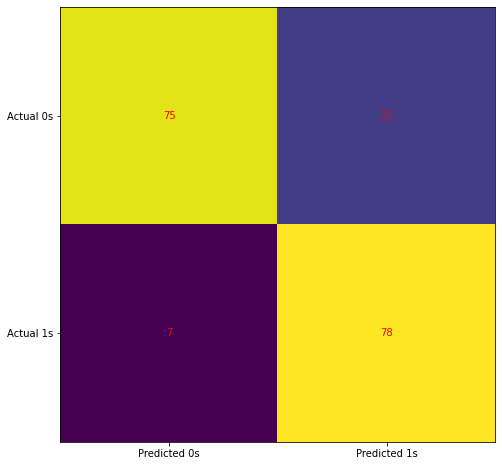

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# grid search:

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
} 

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train_Naive, y_train)
best_accuracy = nbModel_grid.best_score_
best_parameters = nbModel_grid.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Accuracy: 83.75 %
Best Parameters: {'var_smoothing': 0.002848035868435802}


In [ ]:
# building the new Naive Bayse model:

y_pred_Naive = nbModel_grid.predict(X_test_Naive)
accuracy_score(y_test, y_pred_Naive)

0.85

**5. Decision Tree**

In [ ]:
# feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_DT = sc.fit_transform(x_train)
x_test_DT = sc.transform(x_test)

In [ ]:
# Training the Decision Tree Classification model on the Training set:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_DT, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results:
y_pred_DT = classifier.predict(x_test_DT)
print(np.concatenate((y_pred_DT.reshape(len(y_pred_DT),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Confusion matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
accuracy_score(y_test, y_pred_DT)

[[76 19]
 [16 69]]


0.8055555555555556

In [ ]:
# accuracy on the training set:

y_pred_train_DT = classifier.predict(x_train_DT)

accuracy_score(y_train, y_pred_train_DT)  

1.0

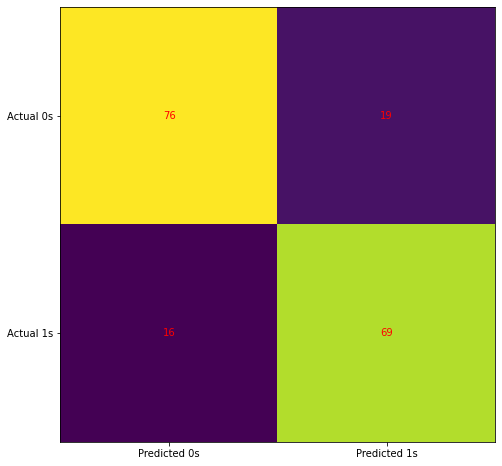

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
param_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth':range(1, 5),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5)

}

grid = GridSearchCV( DecisionTreeClassifier(), 
                    param_grid= param_dict,
                    cv = 10,
                    verbose = 1,
                    n_jobs = -1
    
)

grid.fit(x_train_DT, y_train)
best_params = grid.best_params_
best_score = grid.best_score_

print(best_score)
print(best_params)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
0.8583333333333334
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# building the new Decision Tree  model:

classifier = DecisionTreeClassifier(criterion = 'gini', max_depth= 2, min_samples_leaf= 1, min_samples_split= 2, random_state = 0)
classifier.fit(x_train_DT, y_train)

# Predicting the Test set results:
y_pred_DT = classifier.predict(x_test_DT)
accuracy_score(y_test, y_pred_DT)


# by doing so, we avoided overfiting and increased the accuracy on the test set.

0.8833333333333333

**6. Random Forest:**

In [ ]:
# Feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_forest = sc.fit_transform(x_train)
x_test_forest = sc.transform(x_test)

In [ ]:
# Training the Random Forest Classification model on the Training set:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_forest, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results:
y_pred_forest = classifier.predict(x_test_forest)
print(np.concatenate((y_pred_forest.reshape(len(y_pred_forest),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_forest)
print(cm)
accuracy_score(y_test, y_pred_forest)

[[86  9]
 [11 74]]


0.8888888888888888

In [ ]:
# accuracy in training set:
y_pred_train_forest = classifier.predict(x_train_forest)
accuracy_score(y_train, y_pred_train_forest)

# we have overfiting problem here, with train accuracy being 100% and test accuracy being 88%

1.0

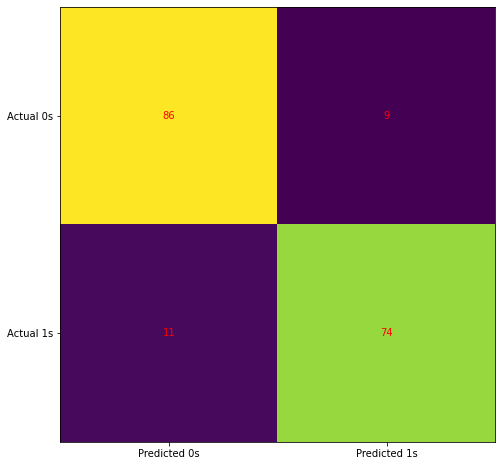

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# grid search:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [3,4],
    'n_estimators': [100, 500]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train_forest,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_score)
print(best_params)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
0.8708333333333333
{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 500}


In [ ]:
# Training the new Random Forest Classification model on the Training set:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 10, max_features = 3, min_samples_leaf = 3, min_samples_split = 3, n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_forest, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=3, min_samples_split=3, random_state=0)

In [ ]:
# Predicting the Test set results:
y_pred_forest = classifier.predict(x_test_forest)
accuracy_score(y_test, y_pred_forest)


0.8833333333333333

In [ ]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_forest)
print(cm)
accuracy_score(y_test, y_pred_forest)

[[85 10]
 [11 74]]


0.8833333333333333

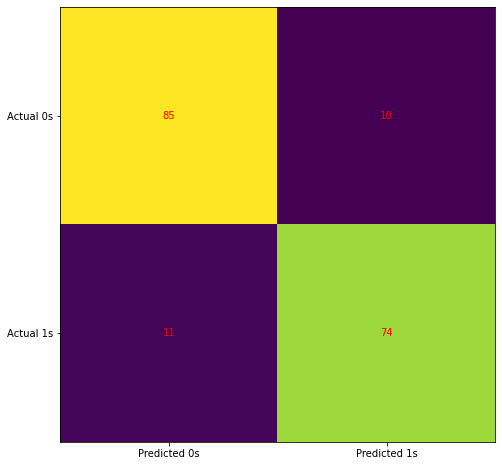

In [ ]:
#visualizing confusion matrix:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

**7. XGBoost**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84 11]
 [10 75]]


0.8833333333333333

In [ ]:
# accuracy on the training set:

y_train_pred = classifier.predict(x_train)
accuracy_score(y_train, y_train_pred)

0.9236111111111112

In [ ]:
# grid search:

param_grid = {
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [2, 3],
    'n_estimators': [100, 200],
    'criterion': ['friedman_mse', 'squared_error', 'mse']
}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_score)
print(best_params)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
0.8680555555555556
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
classifier = XGBClassifier(criterion = 'friedman_mse', max_depth = 10, max_features = 2, min_samples_leaf = 3,  min_samples_split = 2, n_estimators = 100)
classifier.fit(x_train, y_train)

XGBClassifier(criterion='friedman_mse', max_depth=10, max_features=2,
              min_samples_leaf=3, min_samples_split=2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85 10]
 [12 73]]


0.8777777777777778

In [ ]:
# accuracy on the training set:

y_train_pred = classifier.predict(x_train)
accuracy_score(y_train, y_train_pred)    # the grid search led us to overfitting!

0.9986111111111111

## 6. Discussion

The original paper reported the highest accuracy of 86.44% with SVM classifier. 
I got better results with several algorithms. My best results with different algorithms are as follows:




*   Logistic Regression: 87.77%
*   KNN: 87.77%
*   SVM: 89.44%
*   Naive Bayes: 85%
*   Decision Tree: 88.33%
*   Random Forest: 88.33%
*   XGBoost: 88.33%








For further analysis, I suggest using Neural Networks to see if we can get higher classification accuracy.